In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

In [2]:
DATA_PATH = "D:/Data/jupter notebook/HUAWEI-Cup/RandomForest/附件一：325个样本数据.xlsx"

df = pd.read_excel(DATA_PATH)
# show the shape of data
df.shape


# then drop the missing value
df = df.dropna(how = 'any')

df.shape

(325, 367)

In [3]:
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['辛烷值RON'],axis = 1)
X = X.iloc[:,0:35]
y = df['辛烷值RON']

In [4]:
# 分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

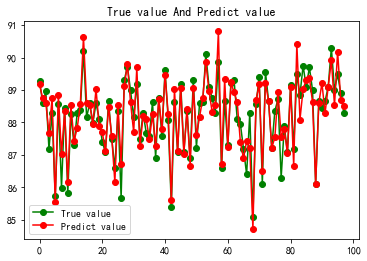

In [5]:
# 从sklearn.svm中导入支持向量机（回归）模型。
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# 使用线性核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_predict = linear_svr.predict(X_test)

plt.figure()
plt.plot(np.arange(98), y_test, "go-", label="True value")
plt.plot(np.arange(98), linear_svr_y_predict, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()
plt.show()

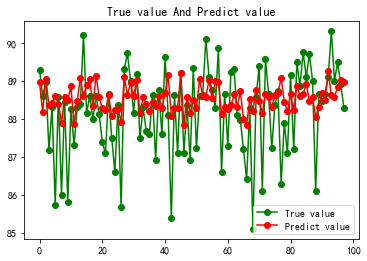

In [6]:
# 使用多项式核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)
poly_svr_y_predict = poly_svr.predict(X_test)

plt.figure()
plt.plot(np.arange(98), y_test, "go-", label="True value")
plt.plot(np.arange(98), poly_svr_y_predict, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()
plt.show()

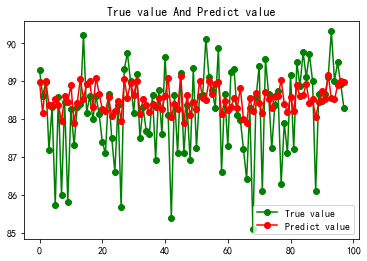

In [7]:
# 使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)

plt.figure()
plt.plot(np.arange(98), y_test, "go-", label="True value")
plt.plot(np.arange(98), rbf_svr_y_predict, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()
plt.show()

In [8]:
# 使用R-squared、MSE和MAE指标对三种配置的支持向量机（回归）模型在相同测试集上进行性能评估。
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R-squared value of linear SVR is', linear_svr.score(X_test, y_test))
print('The mean squared error of linear SVR is', mean_squared_error(y_test, linear_svr_y_predict))
print('The mean absoluate error of linear SVR is', mean_absolute_error(y_test, linear_svr_y_predict))

R-squared value of linear SVR is 0.8575076516787153
The mean squared error of linear SVR is 0.18550438472913328
The mean absoluate error of linear SVR is 0.3308931839801573


In [9]:
print('R-squared value of Poly SVR is', poly_svr.score(X_test, y_test))
print('The mean squared error of Poly SVR is', mean_squared_error(y_test, poly_svr_y_predict))
print('The mean absoluate error of Poly SVR is', mean_absolute_error(y_test, poly_svr_y_predict))

R-squared value of Poly SVR is 0.1667507245861426
The mean squared error of Poly SVR is 1.0847697857650842
The mean absoluate error of Poly SVR is 0.7749168076432008


In [10]:
print('R-squared value of RBF SVR is', rbf_svr.score(X_test, y_test))
print('The mean squared error of RBF SVR is', mean_squared_error(y_test,rbf_svr_y_predict))
print('The mean absoluate error of RBF SVR is', mean_absolute_error(y_test, rbf_svr_y_predict))

R-squared value of RBF SVR is 0.16802635395908294
The mean squared error of RBF SVR is 1.0831091012107377
The mean absoluate error of RBF SVR is 0.7742330765645236
